In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

# Movies on 50's and 60's made more revenue than movies nowadays (00's and 10's)

- **H0** = No difference between revenue of movies between 50's/60's and movies nowadays (00's/10's 
- **H1** = There is a difference 

In [2]:
data_with_inflation = pd.read_csv('data_adjusted_to_inflation.csv')
data_for_ht = data_with_inflation.replace(0,data_with_inflation.median())

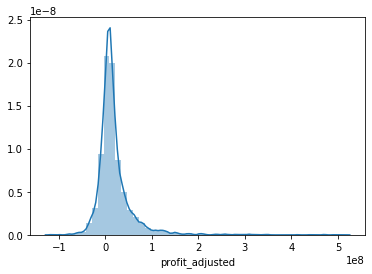

In [3]:
sns.distplot(data_for_ht.profit_adjusted)

In [103]:
fifth_movies_profit_adjusted = (data_for_ht[(data_for_ht['decade'] == "50s")|(data_for_ht['decade'] == "60s")]['profit_adjusted'])
now_movies_profit_adjusted = (data_for_ht[(data_for_ht['decade']== "00s")|(data_for_ht['decade'] == "10s")]['profit_adjusted'])

In [5]:
# romance_movies_profit_adjusted

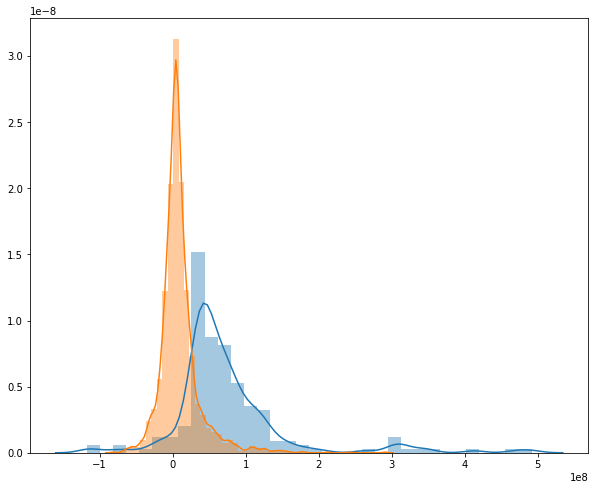

In [6]:
plt.figure(figsize=(10,8))

sns.distplot(fifth_movies_profit_adjusted)
sns.distplot(now_movies_profit_adjusted)


### Sampling samples

In [7]:
import random 

In [8]:
def samples_means(array, samples_wanted):
    sample_means = []
    for i in range(samples_wanted):
        sample_means.append(np.mean(random.sample(list(array), 40)))
    return sample_means

In [131]:
fiv_sample_means = samples_means(fifth_movies_profit_adjusted, 200)
now_sample_means = samples_means(now_movies_profit_adjusted, 200)

print(fiv_sample_means, now_sample_means)

[79759475.1357443, 80806146.53379743, 67535917.54031423, 61176951.373236865, 84698402.57385798, 76543725.62836888, 100070295.8635733, 81181390.5857646, 67290462.60829464, 86550972.5258269, 61508396.67304779, 74897435.1333235, 85583768.63922723, 88205326.81459904, 85549629.46309868, 75108784.29095095, 73933584.56409295, 90588977.91901122, 65583899.54424408, 62125424.18973858, 48998271.92245242, 56153011.67084481, 54855819.49334627, 72148044.08132277, 72646701.79838777, 85641888.16534482, 72597593.62576313, 66823082.244366996, 56901547.00484516, 85473304.6353677, 68307962.9013206, 98511111.01988748, 82286242.33505712, 73892876.83814536, 53735709.99210243, 91920708.51102011, 87528362.246326, 89140142.09521951, 65507230.12681754, 74200538.68831462, 64471080.81009464, 79175369.94721828, 75571789.64708008, 73785257.34433861, 80815565.22128378, 89387297.34571478, 86461012.54280907, 73831711.7177883, 67195724.65534805, 63317098.11851266, 72911450.58669622, 78361113.08798113, 69785402.09142736,

In [108]:
fifth_movies_profit_adjusted = random.sample(list(fifth_movies_profit_adjusted),190)
now_movies_profit_adjusted = random.sample(list(now_movies_profit_adjusted),190)

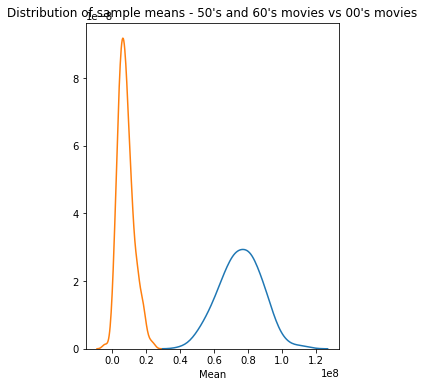

In [132]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.distplot(fiv_sample_means, axlabel='Mean', hist=False)

# plt.subplot(1,2,2)
sns.distplot(now_sample_means, hist=False)

plt.title("Distribution of sample means - 50's and 60's movies vs 00's movies")
plt.show()



In [11]:
# sns.distplot(now_sample_means)

### Back to the two "populations"

In [111]:
print("The mean for 50s movies is :",np.array(fifth_movies_profit_adjusted).mean())
print("The std for 50s movies is :",np.array(fifth_movies_profit_adjusted).std())
print("The var for 50s movies is :",np.array(fifth_movies_profit_adjusted).var())

print('=====================')

print("The mean for now movies is :",np.array(now_movies_profit_adjusted).mean())
print("The std for now movies is :",np.array(now_movies_profit_adjusted).std())
print("The var for now movies is :",np.array(now_movies_profit_adjusted).var())



The mean for 50s movies is : 76575184.523092
The std for 50s movies is : 83199994.06914173
The var for 50s movies is : 6922239013105218.0
The mean for now movies is : 7849667.837659844
The std for now movies is : 25148154.506725453
The var for now movies is : 632429675094135.8


### Welch t-test

In [123]:
def welch_t(a, b):
    
    """ Calculate Welch's t-statistic for two samples. """

    numerator = np.array(a).mean() - np.array(b).mean()
    
    # “ddof = Delta Degrees of Freedom”: the divisor used in the calculation is N - ddof, 
    #  where N represents the number of elements. By default ddof is zero.
    
    denominator = np.sqrt(np.array(a).var(ddof=1)/np.array(a).size + np.array(b).var(ddof=1)/np.array(b).size)
    
    return np.abs(numerator/denominator)

print('Wlech T-test is: {}'.format(welch_t(fifth_movies_profit_adjusted, now_movies_profit_adjusted)))

Wlech T-test is: 10.870291845627412


### Degrees of freedom

In [124]:
# make arrays later
def welch_df(a, b):
    
    """ Calculate the effective degrees of freedom for two samples. """
    
    s1 = np.array(a).var(ddof=1) 
    s2 = np.array(b).var(ddof=1)
    n1 = np.array(a).size
    n2 = np.array(b).size
    
    numerator = (s1/n1 + s2/n2)**2
    denominator = (s1/ n1)**2/(n1 - 1) + (s2/ n2)**2/(n2 - 1)
    
    return numerator/denominator

print('Wlech degrees of freedom are: {}'.format(welch_df(fifth_movies_profit_adjusted, now_movies_profit_adjusted)))

Wlech degrees of freedom are: 223.24896338174338


In [125]:
t = welch_t(fifth_movies_profit_adjusted, now_movies_profit_adjusted)
df = welch_df(fifth_movies_profit_adjusted, now_movies_profit_adjusted)

### Convert to p-value

In [126]:
import scipy.stats as stats

In [127]:
p = 1 - float(stats.t.cdf(t, df))
print(p)

0.0


### Cohen's d test

In [128]:
def Cohen_d(group1, group2):

    # Compute Cohen's d.

    # group1: Series or NumPy array
    # group2: Series or NumPy array

    # returns a floating point number 

    diff = np.mean(group1) - np.mean(group2)

    n1, n2 = len(group1), len(group2)
    var1 = np.var(group1)
    var2 = np.var(group2)

    # Calculate the pooled threshold as shown earlier
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)
    
    return d

In [129]:
Cohen_d(fifth_movies_profit_adjusted, now_movies_profit_adjusted)

1.118214964563947

# Movies nowadays have higher budget than movies on 50's and 60's

- **H0**= No difference between budgets of movies between 50's/60's and movies nowadays (00's/10's)
- **H1**= There is a difference

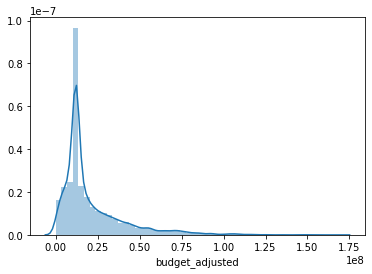

In [20]:
sns.distplot(data_for_ht.budget_adjusted);

### Getting a sample of same length for 50's and nowadays

In [52]:
fifth_movies_budget_adjusted = list(data_for_ht[(data_for_ht['decade'] == "50s")|(data_for_ht['decade'] == "60s")]['budget_adjusted'])
now_movies_budget_adjusted = list(data_for_ht[(data_for_ht['decade']== "00s")|(data_for_ht['decade'] == "10s")]['budget_adjusted'])

In [53]:
len(fifth_movies_budget_adjusted)
# len(now_movies_budget_adjusted)

191

In [54]:
## Making one sample for our 2 samples (in order to get 2 equal length samples)

fifth_movies_budget_adjusted = random.sample(fifth_movies_budget_adjusted,190)
now_movies_budget_adjusted = random.sample(now_movies_budget_adjusted,190)



In [55]:
# romance_movies_profit_adjusted

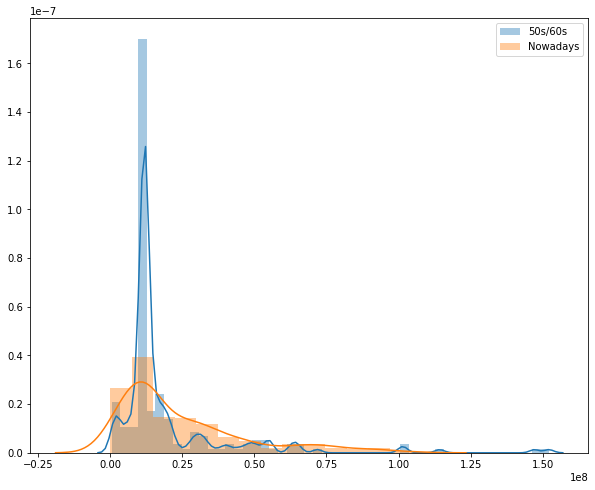

In [56]:
plt.figure(figsize=(10,8))

sns.distplot(fifth_movies_budget_adjusted, label='50s/60s')
sns.distplot(now_movies_budget_adjusted,label='Nowadays' )

plt.legend()




### Sampling samples

In [57]:
import random 

In [58]:
def samples_means(array, samples_wanted):
    sample_means = []
    for i in range(samples_wanted):
        sample_means.append(np.mean(random.sample(list(array), 30)))
    return sample_means

In [59]:
fiv_sample_means = samples_means(fifth_movies_budget_adjusted, 50)
now_sample_means = samples_means(now_movies_budget_adjusted, 50)

print(fiv_sample_means, now_sample_means)

[22941152.36558433, 22738165.2483387, 15840731.18201006, 21745642.48594873, 21337087.52540229, 22324542.4148259, 19684382.884347852, 21252581.82765394, 20003317.97329509, 19070548.050676208, 12104736.067848952, 19359089.79317974, 17842313.735317707, 19461463.139549658, 25405116.92522816, 18249207.78475047, 18890441.171837892, 14490727.305818582, 13370308.641500436, 22469376.63419447, 20427617.560943816, 22260402.90841667, 19738971.602824368, 20516948.209976483, 15755546.054889677, 17509945.114091698, 18949222.674854208, 18792229.66361649, 16492757.787654348, 20817684.35927296, 16519017.361342546, 17573315.069532294, 15645229.385189088, 18237152.609674104, 16746467.706385585, 24663810.625202764, 18087452.28410498, 22571206.900952265, 22354728.43715312, 16668837.680456717, 16160674.979455976, 22851202.23849466, 22186044.624767724, 26011491.941385306, 17819431.386247672, 20251401.465256687, 22014559.383754708, 20814216.666208517, 22579869.049663555, 19910860.498510815] [29243494.31775956,

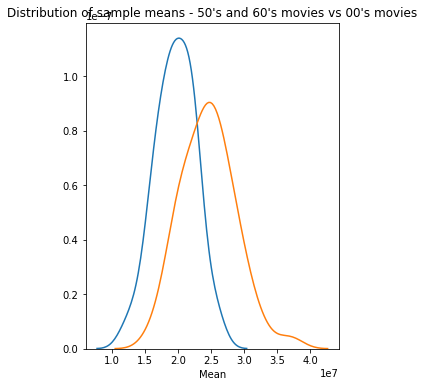

In [60]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.distplot(fiv_sample_means, axlabel='Mean', hist=False)

# plt.subplot(1,2,2)
sns.distplot(now_sample_means, bins = 20, hist=False)

plt.title("Distribution of sample means - 50's and 60's movies vs 00's movies")
plt.show()




In [30]:
# sns.distplot(now_sample_means)

### Back to the two "populations"

In [61]:
print("The mean for 50s movies is :", np.mean(fifth_movies_budget_adjusted))
print("The std for 50s movies is :",np.std(fifth_movies_budget_adjusted))
print("The var for 50s movies is :",np.var(fifth_movies_budget_adjusted))

print('=====================')

print("The mean for now movies is :",np.mean(now_movies_budget_adjusted))
print("The std for now movies is :",np.std(now_movies_budget_adjusted))
print("The var for now movies is :",np.var(now_movies_budget_adjusted))



The mean for 50s movies is : 19805174.75636675
The std for 50s movies is : 21941445.816540312
The var for 50s movies is : 481427044520174.4
The mean for now movies is : 24408064.058732234
The std for now movies is : 22164613.65691226
The var for now movies is : 491270098560181.4


### Welch t-test

In [32]:
# def welch_t(a, b):
    
#     """ Calculate Welch's t-statistic for two samples. """

#     numerator = np.mean(a) - np.mean(b)
    
#     # “ddof = Delta Degrees of Freedom”: the divisor used in the calculation is N - ddof, 
#     #  where N represents the number of elements. By default ddof is zero.
    
#     denominator = np.sqrt(a.var(ddof=1)/a.size + b.var(ddof=1)/b.size)
    
    
#     return np.abs(numerator/denominator)

# print('Wlech T-test is: {}'.format(welch_t(fifth_movies_budget_adjusted, now_movies_budget_adjusted)))

In [62]:
def welch_t(a, b):
    
    """ Calculate Welch's t-statistic for two samples. """

    numerator = np.mean(a) - np.mean(b)
    
    # “ddof = Delta Degrees of Freedom”: the divisor used in the calculation is N - ddof, 
    #  where N represents the number of elements. By default ddof is zero.
    
    denominator = np.sqrt(np.var(a, ddof=1)/len(a) + np.var(b, ddof=1)/len(b))
    np.var(a, ddof=1)
    
    return np.abs(numerator/denominator)

print('Wlech t-statistics is: {}'.format(welch_t(fifth_movies_budget_adjusted, now_movies_budget_adjusted)))

Wlech t-statistics is: 2.0289559221353826


### Degrees of freedom

In [63]:
def welch_df(a, b):
    
    """ Calculate the effective degrees of freedom for two samples. """
    
    s1 = np.var(a, ddof=1) 
    s2 = np.var(b, ddof=1)
    n1 = len(a)
    n2 = len(b)
    
    numerator = (s1/n1 + s2/n2)**2
    denominator = (s1/ n1)**2/(n1 - 1) + (s2/ n2)**2/(n2 - 1)
    
    return numerator/denominator

print('Wlech degrees of freedom are: {}'.format(welch_df(fifth_movies_budget_adjusted, now_movies_budget_adjusted)))

Wlech degrees of freedom are: 377.96129636207274


In [64]:
t2 = welch_t(fifth_movies_budget_adjusted, now_movies_budget_adjusted)
df2 = welch_df(fifth_movies_budget_adjusted, now_movies_budget_adjusted)

### Convert to p-value

In [65]:
import scipy.stats as stats

In [66]:
p = 1 - float(stats.t.cdf(t2, df2))
print(p)

0.021581626852990587


### Cohen's d test

In [122]:
Cohen_d(now_movies_budget_adjusted, fifth_movies_budget_adjusted)

0.20871646380727657

### Evaluating pdf's

In [68]:
import scipy.stats

In [86]:
fiv_for_pdf = scipy.stats.norm(np.mean(fifth_movies_budget_adjusted), np.std(fifth_movies_budget_adjusted))

now_for_pdf = scipy.stats.norm(np.mean(now_movies_budget_adjusted), np.std(now_movies_budget_adjusted))

In [88]:
# same for distribution of means

fiv_for_pdf = scipy.stats.norm(np.mean(fiv_sample_means), np.std(fiv_sample_means))

now_for_pdf = scipy.stats.norm(np.mean(now_sample_means), np.std(now_sample_means))



In [89]:
def evaluate_PDF(rv, x=4):
    '''Input: a random variable object, standard deviation
    output : x and y values for the normal distribution
    '''
    
    # Identify the mean and standard deviation of random variable 
    mean = rv.mean()
    std = rv.std()

    # Use numpy to calculate evenly spaced numbers over the specified interval (4 sd) and generate 100 samples.
    xs = np.linspace(mean - x*std, mean + x*std, 100)
    
    # Calculate the peak of normal distribution i.e. probability density. 
    ys = rv.pdf(xs)

    return xs, ys

Text(0.5, 0, 'Budet')

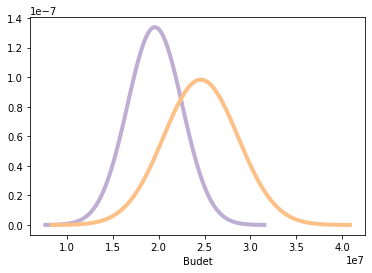

In [90]:
xs, ys = evaluate_PDF(fiv_for_pdf)
plt.plot(xs, ys, label='50s/60s', linewidth=4, color='#beaed4') 


xs, ys = evaluate_PDF(now_for_pdf)
plt.plot(xs, ys, label='Now', linewidth=4, color='#fdc086')

plt.xlabel('Budet')

### Difference in sample means (Effect Size)

In [96]:
mean1 = np.mean(fiv_sample_means)
mean2 = np.mean(now_sample_means)

In [97]:
sample_of_sm_distr_fifth = random.sample(fiv_sample_means, 50)
sample_of_sm_distr_now = random.sample(now_sample_means, 50)


In [98]:
difference_in_means = abs(mean1 - mean2)
difference_in_means
print("Difference between sample means (Effect size) is {}".format(difference_in_means))

Difference between sample means (Effect size) is 5000224.8100538775


## Power

### Sample size requirements for a given Cohen's d 

In [100]:
# number_of_samples = []
# for i in [0.2, 0.25, 0.3, 0.35, 0.40, 0.45, 0.50, 0.60, 0.70, 0.80]:
#     number_of_samples.append(power.solve_power(effect_size= i, alpha=0.05, power=0.8))
#     print("Number of samples =  {} when alpha is: {},and power is: {}".format(number_of_samples, 0.05, 0.8))

In [101]:
# power.solve_power(effect_size= np.mean(), alpha=0.05, power=0.8)

### Calculating power

In [78]:
# # Ones sample from samples 
# sample_for_power_fifth = random.sample(fifth_movies_budget_adjusted, 100)
# sample_for_power_now = random.sample(now_movies_budget_adjusted, 100)


# sample_size = len(sample_for_power_fifth)

In [79]:
# This one is with the original samples 

# sample_for_power_fifth = fifth_movies_budget_adjusted
# sample_for_power_now = now_movies_budget_adjusted


# sample_size1 = len(sample_for_power_fifth)
# sample_size2 = len(sample_for_power_now)


In [80]:
# mean and std for movies 50s and 60s 
# fifth_sample_mean_power = np.mean(sample_for_power_fifth)
# fifth_sample_std_power = np.std(sample_for_power_fifth)


# # mean and std for movies nowadays 
# now_sample_mean_power = np.mean(sample_for_power_now)
# now_sample_std_power = np.std(sample_for_power_now)


# # number of simulations
# number_of_simulation = 1000

In [121]:
# np.random.seed(30)

# # Initialize array to store results
# p = (np.empty(number_of_simulation))
# p.fill(np.nan)

# #  Run a for loop for range of values in n_sim

# for s in range(number_of_simulation):

#     fifth = np.random.normal(loc= fifth_sample_mean_power, scale=fifth_sample_std_power, size=sample_size1)
    
#     now = np.random.normal(loc= now_sample_mean_power, scale=now_sample_std_power, size=sample_size2)
    
#     t_test = stats.ttest_ind(sample_for_power_fifth, sample_for_power_now)
    
#     p[s] = t_test[1]

# # number of null hypothesis rejections
# num_null_rejects = np.sum(p < 0.05)
# power = num_null_rejects/float(number_of_simulation)

# power